# One-way ANOVA

For the one-way ANOVA, you can use either the function in "scipy.stats". Alternatively, you can use the "statsmodel" tools: they provide more, and nicer formatted, information.

Author:  Thomas Haslwanter, Date:    Feb-2017

In [1]:
%pylab inline
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# The importance of the variance

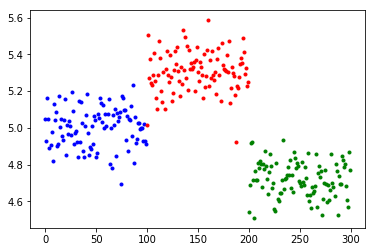

In [2]:
centers = [5, 5.3, 4.7]
std1 = 0.1
colors = 'brg'

data1 = []
for ii in range(3):
    data1.append(stats.norm(centers[ii], std1).rvs(100))
    plot(arange(len(data1[ii]))+ii*len(data1[0]), data1[ii], '.', color=colors[ii])

In [4]:
data1[0]

array([5.04614817, 4.92927692, 5.16107205, 5.05015404, 4.88739983,
       4.90388347, 4.97547151, 4.82081462, 5.13231738, 5.04373109,
       5.08687299, 4.90010586, 4.91095055, 5.17479219, 5.00540311,
       5.04779988, 4.95789308, 4.93157987, 5.0420634 , 5.15451979,
       4.85039816, 5.017734  , 4.96366836, 5.03549103, 5.01201883,
       4.96240659, 5.19524823, 5.09201117, 4.91138382, 4.97018549,
       4.98232163, 4.92040401, 4.83877277, 5.14464915, 4.9222298 ,
       5.13869943, 5.02881934, 4.87115781, 4.84342673, 5.00945363,
       5.07166993, 5.18217761, 4.97182632, 4.85144784, 4.89560606,
       4.88407278, 5.01218176, 4.91096191, 5.06690788, 5.04521763,
       4.84080762, 4.86386708, 5.07650588, 5.05484714, 5.16499317,
       5.1358201 , 5.02920424, 5.12270882, 4.99901286, 5.0741404 ,
       5.01090052, 5.0767541 , 5.1596906 , 4.80131469, 4.99895033,
       4.78122763, 5.07011249, 5.01697946, 5.10112784, 4.84423947,
       5.0801198 , 5.03497081, 5.05993428, 5.08423351, 4.69602

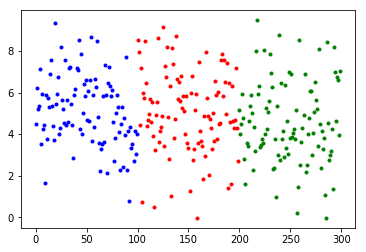

In [3]:
std2 = 2
data2 = []
for ii in range(3):
    data2.append(stats.norm(centers[ii], std2).rvs(100))
    plot(arange(len(data1[ii]))+ii*len(data2[0]), data2[ii], '.', color=colors[ii])

**Note:** In both cases the means have the same difference, but the variance is much larger in data2!

## ANOVA with Sample Data

### Get and sort sample data

*Twenty-two patients undergoing cardiac bypass surgery were randomized to one of three ventilation groups:*
    
  - *Group I: Patients received 50% nitrous oxide and 50% oxygen mixture continuously for 24 h.*
  - *Group II: Patients received a 50% nitrous oxide and 50% oxygen mixture only dirng the operation.*
  - *Group III: Patients received no nitrous oxide but received 35-50% oxygen for 24 h.*
    
*The data show red cell folate levels for the three groups after 24h' ventilation.*

In [6]:
# Get the data
inFile = 'altman_910.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'

url = url_base + inFile
data = genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0] # finally got it ! tricky enough
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

In [11]:
data

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

In [12]:
data[:, 1]

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       3., 3., 3., 3., 3.])

In [15]:
data[0, : ]

array([243.,   1.])

In [16]:
data[ :, 0]

array([243., 251., 275., 291., 347., 354., 380., 392., 206., 210., 226.,
       249., 255., 273., 285., 295., 309., 241., 258., 270., 293., 328.])

In [17]:
group1

array([243., 251., 275., 291., 347., 354., 380., 392.])

### Levene-test
A Levene-test and/or a normality test should be made before applying a oneway ANOVA.

In [7]:
# check if the variances are equal with the "Levene"-test
(W,p) = stats.levene(group1, group2, group3)
if p<0.05:
    print('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p))

### One-way ANOVA

In [18]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print('The results from the one-way ANOVA, with the data from Altman 910: F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('One of the groups is significantly different.')

The results from the one-way ANOVA, with the data from Altman 910: F=3.7, p=0.04359
One of the groups is significantly different.


## Elegant alternative implementation, with pandas & statsmodels

In [19]:
df = pd.DataFrame(data, columns=['value', 'treatment'])    

# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


In [22]:
df.head()

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0
